# REAL RACING 3 VEHICLES - OUTCOME 3

### Welcome to my 3rd part of data analysis for Real Racing 3 vehicles!

So far, **two** parts have been completed and we've performed lots of data analysis on these vehicles and found many interesting patterns that provided us great insights about the vehicles presented in the game.

After a long waiting, here we are for the **3rd part**! This time, my focus will be on **data visualization**. We know that a figure could tell us hundreds of words, right?

As always, let's load the necessary modules initially. Again, we're going to use the vehicle roster from game version 8.1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v8_1.csv')

By the way, I added the performance stats for Mercedes-AMG's F1 Safety Car, so I don't expect it to be troublesome.

If you remember the 2nd part, the last thing I did was to make a plot graph to show the breakdown of count of career series eligibility among all vehicles. Let me redo everything here as I left previously:

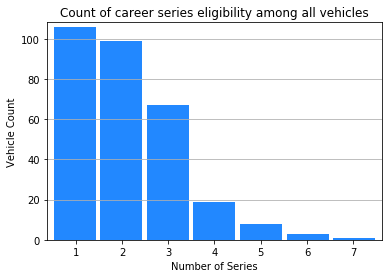

In [3]:
series_count = rr3_df['Series'].values
plt.hist(series_count, bins=int(rr3_df['Series'].max()), color='#2288ff', rwidth=0.9)
plt.title('Count of career series eligibility among all vehicles')
plt.xlabel('Number of Series')
plt.ylabel('Vehicle Count')
plt.grid(axis='y')
plt.margins(0.02)
plt.xticks([1.45, 2.3, 3.15, 4, 4.85, 5.7, 6.55], [1, 2, 3, 4, 5, 6, 7])
plt.show()

Well, there's no doubt that the **histogram** with these settings above is easily interpretable. Although this looks OK, couldn't there be any other way to present it better and without much struggling through settings (e.g. manually entering ticks for x-coord)?

This time, I will have a go for the **bar** graph:

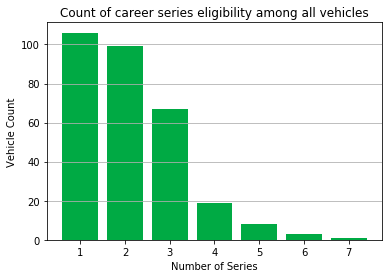

In [4]:
plt.bar(range(1,rr3_df['Series'].max()+1), rr3_df['Series'].value_counts().values, color='#00aa44')
plt.grid(axis='y')
plt.title('Count of career series eligibility among all vehicles')
plt.xlabel('Number of Series')
plt.ylabel('Vehicle Count')
plt.show()

Ah yes, that's what I wanted! The **bar** graph is much more suitable for this kind of info to show. Compare both these graphs, then. Which one do you think is easier to apply? 

Now, it's time to focus on other things for our dataset. Following the same task, let's make a bar graph for counting **the vehicle classes** individually:

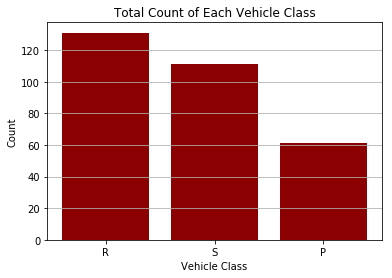

In [5]:
plt.bar(rr3_df['Class'].unique(), rr3_df['Class'].value_counts().values, color='darkred')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.title('Total Count of Each Vehicle Class')
plt.grid(axis='y')
plt.show()

As I've stated in the previous part, **R (Race) class** vehicles have the most appearance within the vehicle roster (over 120). But, if we think the current shape of the game, the career ( now called, _Road Collection_ ) contains several vehicles from that class, i.e. not all of them could be found in _Motorsports_ series.

Next, how about the count of **purchase type**?

Uh oh, I almost forgot! The F1 safety car (from Mercedes-AMG) gave me some trouble previosuly due to NaN value for `Purchase_Cost`! I'll make the count operation by defining a temporary dataset without it!

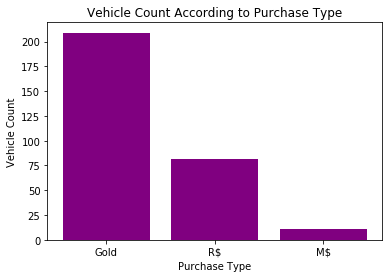

In [6]:
rr3_df_1 = rr3_df.drop(219, axis=0)
gold_c = rr3_df_1['Purchase_Cost'].str.contains('Gold').values.sum()
rdollar_c = rr3_df_1['Purchase_Cost'].str.contains('R\$').values.sum()
mdollar_c = rr3_df_1['Purchase_Cost'].str.contains('M\$').values.sum()
plt.bar(['Gold', 'R\$', 'M\$'], [gold_c, rdollar_c, mdollar_c], color='purple')
plt.title('Vehicle Count According to Purchase Type')
plt.xlabel('Purchase Type')
plt.ylabel('Vehicle Count')
plt.show()

Yeah, I remember that there are lots of vehicles purchasable with **Gold** (over 200) and not much with **R\$**. Note that **M$** is the new addition to the game since version 8.0, where 2019 Season Formula 1 vehicles have been presented. That's why its count is very low!

Well, for a more complicated count, I'd like to **combine these two criterions**, where the count is performed by comparing _the classes against their purchase types_. To make it work, I have to create another column to store only the purchase type as a string (e.g. only `R$`, `Gold` and `M$`). Then, a pivot table will be useful here:

In [7]:
def get_purchase_type(x):
    if x[-2:] == 'R$':
        return 'R$'
    elif x[-4:] == 'Gold':
        return 'Gold'
    elif x[-2:] == 'M$':
        return 'M$'
rr3_df_1['Purchase_Type'] = rr3_df_1['Purchase_Cost'].apply(get_purchase_type)

In [8]:
table = rr3_df_1.pivot_table(index=['Class'], columns=['Purchase_Type'], values=['Model'], aggfunc='count').fillna(0)
table

Model            
Purchase_Type   Gold    M$    R$
Class                           
P               33.0   0.0  28.0
R              101.0  11.0  18.0
S               75.0   0.0  36.0

That's more like it! That table gave us more insights for the count of classes against the purchase types of the vehicles! Compare this with the bar graphs above...

_Now, my concern is to represent them altogether with a nice visualization:_

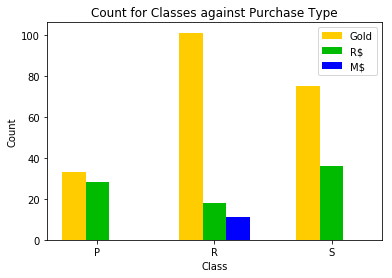

In [9]:
x = np.array([0, 0.5, 1])
fig, ax = plt.subplots()
width = 0.1
ax.bar(x - 0.1, table.loc[:,('Model','Gold')].values, width, label='Gold', color='#ffcc00')
ax.bar(x, table.loc[:,('Model','R$')].values, width, label='R$', color='#00bb00')
ax.bar(x + 0.1, table.loc[:,('Model','M$')].values, width, label='M$', color='blue')
plt.xticks([0, 0.5, 1.0], ['P', 'R', 'S'])
plt.title('Count for Classes against Purchase Type')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()

Yep, this looks great! We successfully converted the above table into a bar graph with multiple values in it!

By examining the table and the graph, our implication should be that you must have lots of gold in hand to be able to enjoy the races with **R-class** vehicles! And, there are 101 of them. For **S-class**, Gold is still dominating (which is 75). For **P-class**, there are not much gap between Gold and R$ (33 vs 28).

Going back to our original dataframe, now I want to do the same for **Class** against **Drive Type** together. However, a little data wrangling is needed for `Type`, such that I have to get rid of `(RHD)` and `(MHD)`.

In [10]:
rr3_df['Type'] = rr3_df['Type'].apply(lambda x: x[:2])
# rr3_df['Type'].value_counts()

That should look nice. Now, let's carry this out:

In [11]:
table = rr3_df.pivot_table(index=['Class'], columns=['Type'], values=['Model'], aggfunc='count').fillna(0)

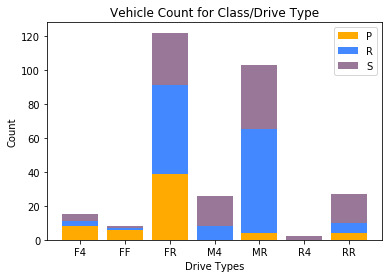

In [12]:
width = 0.25
table_columns = table.columns.levels[1]
x = np.arange(len(table.columns))
plt.bar(table_columns, table.loc['P'], label='P', color='#ffaa00')
plt.bar(table_columns, table.loc['R'], bottom=table.loc['P'], label='R', color='#4488ff')
plt.bar(table_columns, table.loc['S'], bottom=(table.loc['R']+table.loc['P']), label='S', color='#997799')
plt.xticks(x, table_columns)
plt.title('Vehicle Count for Class/Drive Type')
plt.xlabel('Drive Types')
plt.ylabel('Count')
plt.legend()
plt.show()

Here, this time I wanted to make a stacked bar here. From this graph, it seems that **FR drive type** has the most density among all vehicles, and it seems that **R-class** is favored (over 50). About the highest count of class/drive type combination, we can come across approx. 60 vehicles as **R-class with MR type** (confirm this with your own eyes!). Last but not the least, I find these combinations as the rarest ones: **R-class/FF**, **S-class/FF** and **S-class/R4**.

_All right, you might get bored with these graphs for counting I think._

Continuing our EDA of Real Racing 3, we already know that all vehicle stats are stored as numeric values, these are `Top_Speed`, `Acceleration`, `Braking` and `Grip`. How about creating the **ECDF** of each?

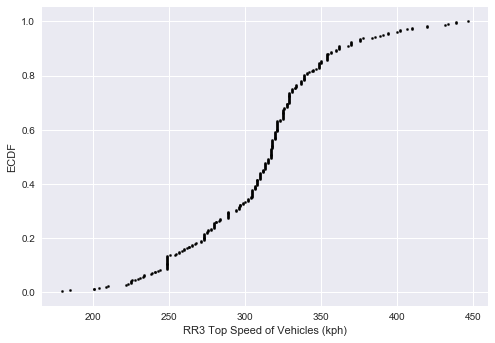

In [13]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
plt.style.use('seaborn')
x_speed, y_speed = ECDF(rr3_df['Top_Speed'])
plt.scatter(x_speed, y_speed, marker='.', color='black', s=20)
plt.xlabel('RR3 Top Speed of Vehicles (kph)')
plt.ylabel('ECDF')
plt.show()

From this graph above, we can imply that most of the vehicles have the top speed of between **300** and **350** kph. And, another claim is that **over 80%** of the vehicles have less than **350** kph of top speed. Will we see a similar ECDF for `Acceleration`?

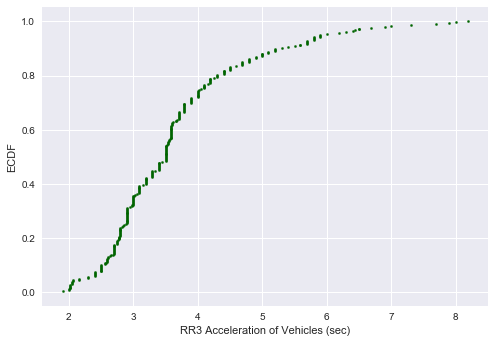

In [14]:
x_acc, y_acc = ECDF(rr3_df['Acceleration'])
plt.scatter(x_acc, y_acc, marker='.', color='darkgreen', s=20)
plt.xlabel('RR3 Acceleration of Vehicles (sec)')
plt.ylabel('ECDF')
plt.show()

Well, probably not! Look at the curve in general, it looks **more convex** than the one for `Top_Speed`. From this graph, it is more likely for a vehicle to have an acceleration value of **less than 4 seconds**. I believe most **S** and **R-class** vehicles should belong to this part; likewise, most **P-class** ones should lie in the rest. Lastly, it seems that there are many many small groups of values that involve identical acceleration values.

Now, I wonder the ECDF of `Braking` and `Grip`:

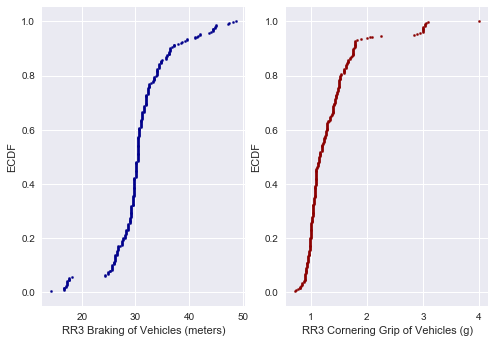

In [15]:
plt.subplot(1, 2, 1)
x_brake, y_brake = ECDF(rr3_df['Braking'])
plt.scatter(x_brake, y_brake, marker='.', color='darkblue', s=20)
plt.xlabel('RR3 Braking of Vehicles (meters)')
plt.ylabel('ECDF')
plt.subplot(1, 2, 2)
x_grip, y_grip = ECDF(rr3_df['Grip'])
plt.scatter(x_grip, y_grip, marker='.', color='darkred', s=20)
plt.xlabel('RR3 Cornering Grip of Vehicles (g)')
plt.ylabel('ECDF')
plt.show()

Both of them are somewhat interesting! First of all, there are some disconnection of values at the bottom of ECDF of `Braking` and similarly, at the top of ECDF of `Grip`. One thing I'm absolutely sure is that (and I believe you'll agree with me) if you've carefully inspected the corresponding values of **Formula 1 vehicles** within the game, be it from 2019 Season or others already existed, notice that they have **very strong** braking performance (under **20** meters) and **very high** cornering grip (around **3.00** g)! This sounds pretty likely!

For a general interpretation, most of the vehicles' braking performance lie around **30 meters** and there exist several vehicles performing worse than those! Thus, be more careful when you begin braking with such vehicles in order not to go off-track!

About the cornering grip, players mostly drive vehicles with grip of between **0.9** and **1.1** g (considering no upgrades have been applied). That's where many **P** and **S-class** vehicles should lie here. You have to pay more attention when attempting to enter a corver fast! Of course, the value increases slowly; hence, it is more likely to reflect **R-class** specs.

_Also, did you remember which vehicle possessed a cornering grip of **4.00 g**? Give yourself a medal if you guessed it correctly!_

For something much fancier, let's combine them all and include **PR value** in one plot. For this to work, all these values above, including PR, must be normalized! Then, are we able to see something surprising?

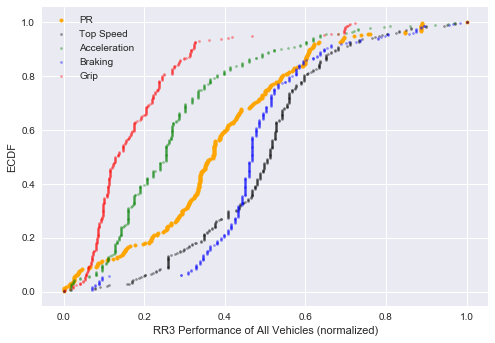

In [16]:
x_pr, y_pr = ECDF(rr3_df['PR'])
x_pr /= x_pr.max()
x_speed = x_speed.astype('float64')
x_speed -= x_speed.min()
x_speed /= x_speed.max()
x_acc -= x_acc.min() 
x_acc /= x_acc.max()
x_brake -= x_brake.min()
x_brake /= x_brake.max()
x_grip -= x_grip.min()
x_grip /= x_grip.max()
plt.scatter(x_pr, y_pr, marker='.', color='orange', s=50, label='PR')
plt.scatter(x_speed, y_speed, marker='.', color='black', s=20, label='Top Speed', alpha=0.4)
plt.scatter(x_acc, y_acc, marker='.', color='green', s=20, label='Acceleration', alpha=0.4)
plt.scatter(x_brake, y_brake, marker='.', color='blue', s=20, label='Braking', alpha=0.4)
plt.scatter(x_grip, y_grip, marker='.', color='red', s=20, label='Grip', alpha=0.4)
plt.xlabel('RR3 Performance of All Vehicles (normalized)')
plt.ylabel('ECDF')
plt.legend()
plt.show()

Hmmm, after normalizing everything here, this is weird at first. Anyway, for this ECDF, from **15%** up to **80%**, the **PR** value roughly stay in the middle when compared to 4 other distinctive values. For a particular PR in that range, **grip** and **acceleration** are on the left; **braking** and **top speed** are on the right. In other words, while determining the PR, in my opinion, braking and top speed have higher values while grip and acceleration have lower, considering in their own categories each. _Well, that's a bit confusing!_

After this ECDF operation, now I'd like to see the **correlations** between these 4 groups of values... Let's tackle them all by creating plots individually and find their relationships in terms of positivity or negativity:

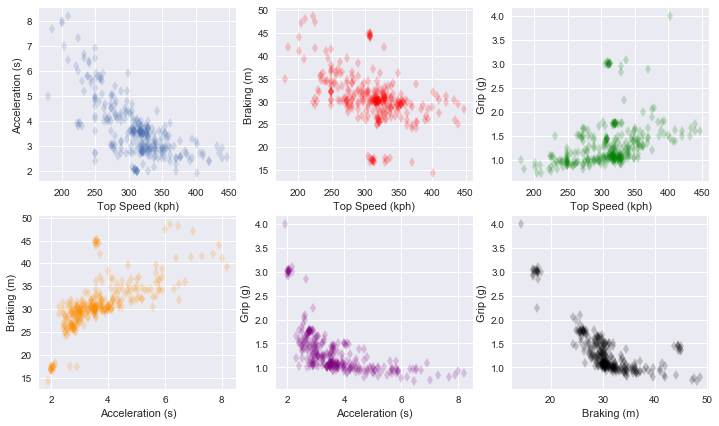

In [17]:
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
plt.plot(rr3_df['Top_Speed'], rr3_df['Acceleration'], linewidth=1, marker='d', linestyle='none', alpha=0.2)
plt.xlabel('Top Speed (kph)')
plt.ylabel('Acceleration (s)')
plt.subplot(2,3,2)
plt.plot(rr3_df['Top_Speed'], rr3_df['Braking'], linewidth=1, marker='d', linestyle='none', alpha=0.2, color='red')
plt.xlabel('Top Speed (kph)')
plt.ylabel('Braking (m)')
plt.subplot(2,3,3)
plt.plot(rr3_df['Top_Speed'], rr3_df['Grip'], linewidth=1, marker='d', linestyle='none', alpha=0.2, color='green')
plt.xlabel('Top Speed (kph)')
plt.ylabel('Grip (g)')
plt.subplot(2,3,4)
plt.plot(rr3_df['Acceleration'], rr3_df['Braking'], linewidth=1, marker='d', linestyle='none', alpha=0.2, color='darkorange')
plt.xlabel('Acceleration (s)')
plt.ylabel('Braking (m)')
plt.subplot(2,3,5)
plt.plot(rr3_df['Acceleration'], rr3_df['Grip'], linewidth=1, marker='d', linestyle='none', alpha=0.2, color='purple')
plt.xlabel('Acceleration (s)')
plt.ylabel('Grip (g)')
plt.subplot(2,3,6)
plt.plot(rr3_df['Braking'], rr3_df['Grip'], linewidth=1, marker='d', linestyle='none', alpha=0.2, color='black')
plt.xlabel('Braking (m)')
plt.ylabel('Grip (g)')
plt.show()

It is great to examine all these correlations in just one plot group, isn't it? At the same time, let's get the **correlation coefficients (Pearson)** in numerical way:

In [18]:
tspeed_values = rr3_df['Top_Speed'].values
acc_values = rr3_df['Acceleration'].values
brake_values = rr3_df['Braking'].values
grip_values = rr3_df['Grip'].values
print("Correlation between Top Speed & Acceleration: {:.4}".format(np.corrcoef(tspeed_values, acc_values)[0,1]))
print("Correlation between Top Speed & Braking: {:.4}".format(np.corrcoef(tspeed_values, brake_values)[0,1]))
print("Correlation between Top Speed & Grip: {:.4}".format(np.corrcoef(tspeed_values, grip_values)[0,1]))
print("Correlation between Acceleration & Braking: {:.4}".format(np.corrcoef(acc_values, brake_values)[0,1]))
print("Correlation between Acceleration & Grip: {:.4}".format(np.corrcoef(acc_values, grip_values)[0,1]))
print("Correlation between Braking & Grip: {:.4}".format(np.corrcoef(brake_values, grip_values)[0,1]))

Correlation between Top Speed & Acceleration: -0.7075
Correlation between Top Speed & Braking: -0.4558
Correlation between Top Speed & Grip: 0.3617
Correlation between Acceleration & Braking: 0.7048
Correlation between Acceleration & Grip: -0.6012
Correlation between Braking & Grip: -0.7324


Compare both the values here and the corresponding plots. They look very sensible, yes?

It is definitely right to say that top speed and acceleration are **negatively correlated** with a magnitude of 0.7, with regards to the numerical values. That is, if the vehicle can reach **higher top speed**, it is expected to have **faster acceleration**, thus **lower values**. This is the claim we get...

Similarly, "Top Speed & Braking", "Acceleration & Grip" and "Braking & Grip" are also negatively correlated with different magnitudes as seen above. I'll leave the interpretation to you.

On the other hand, these two pairs are **positively correlated**: "Top Speed & Grip" and "Acceleration & Braking" with magnitude of 0.36 and 0.7, respectively. So, if one value is increasing, then it is expected for the other one to go up, where greater effect can be seen for the second pair.

Now, can we consolidate everything such that their correlations are packed together and color-coded? Seaborn's **heat map** will help us greatly for that! This time, it contains three additional columns: `PR`, `Service Cost` and `Service Time`, despite a few NaN values...

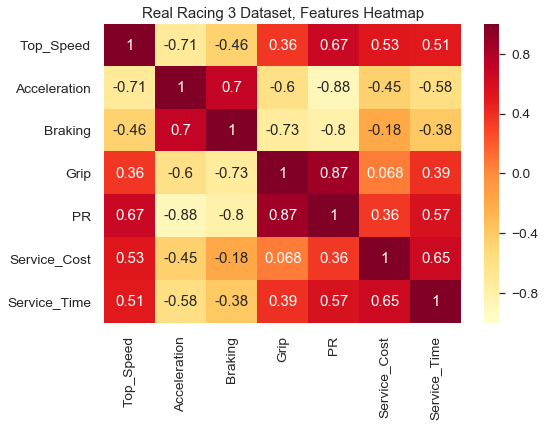

In [19]:
rr3_df_vehicle_values = rr3_df[['Top_Speed', 'Acceleration', 'Braking', 'Grip', 'PR', 'Service_Cost', 'Service_Time']]
sns.set(font_scale=1.25)
sns.heatmap(rr3_df_vehicle_values.corr(), cmap='YlOrRd', annot=True, vmin=-1, vmax=1)
plt.title('Real Racing 3 Dataset, Features Heatmap')
plt.show()

**Excellent!** All these correlation values are beautifully here in a heat map. For the first 4 columns, they should be roughly the same as the things we calculated above. Plus, inspect the newly added columns in terms of their correlations against the existing ones.

Interestingly, **PR** has **higher** correlation magnitudes especially when compared to Acceleration, Braking and Grip, both positively and negatively.

This heat map clearly shows us that **Acceleration** and **Braking** are causing **negative** correlations overall, but when they are taken mutually, it is **positive**. That's an imporant outcome!

OK, lastly, I want to generate some **box plots**, seperated by the vehicle classes. Let's see the mean, quantiles and outliers of these columns visually:

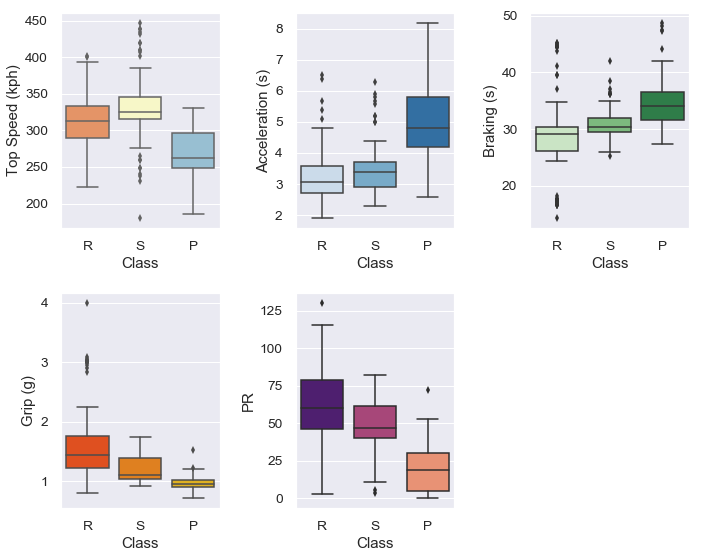

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(rr3_df['Class'], rr3_df['Top_Speed'], palette='RdYlBu')
plt.ylabel('Top Speed (kph)')
plt.subplot(2,3,2)
sns.boxplot(rr3_df['Class'], rr3_df['Acceleration'], palette='Blues')
plt.ylabel('Acceleration (s)')
plt.subplot(2,3,3)
sns.boxplot(rr3_df['Class'], rr3_df['Braking'], palette='Greens')
plt.ylabel('Braking (s)')
plt.subplot(2,3,4)
sns.boxplot(rr3_df['Class'], rr3_df['Grip'], palette='autumn')
plt.ylabel('Grip (g)')
plt.subplot(2,3,5)
sns.boxplot(rr3_df['Class'], rr3_df['PR'], palette='magma')
plt.tight_layout()
plt.show()

These box plots should give valuable insights and the separation by classes enabled us to identify the characteristics of vehicles much more. **This is absolutely fantastic!**

Let me tell you what these lines in and out of these boxes mean:

- The bottom line outside of the colored box represents the **minimum** value.
- The bottom line within the colored box represents the **25th percentile** value.
- The middle line within the colored box represents the **median** value (50th percentile).
- The top line within the colored box represents the **75th percentile** value.
- The top line outside of the colored box represents the **maximum** value.
- And, the black diamonds are **outliers**!

Wow, we can come across many outliers out there especially with some combinations. _For example, Top Speed of S-class, Acceleration of R-class._

## All right, folks! That concludes the 3rd part of Real Racing 3 Vehicles outcomes!

### All in all, we put the emphasis on data visualization here.

**I hope you enjoyed a lot while observing the plots and reading the analyses I've written. Well, I will come back for something much different to continue my outcome series here.**

**Until next time, keep racing!!!**